Name - **D.M.S.S.Dissanayake**   
Index No - **190155L**

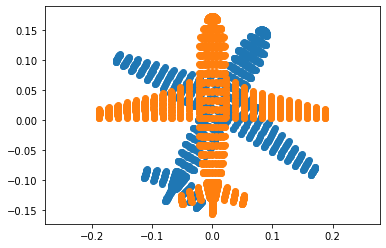

In [17]:
# Question 1
import numpy as np
from plyfile import PlyData, PlyElement
import matplotlib.pyplot as plt 

pcd = PlyData.read(r'airplane.ply')
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1,-1), pcd['vertex']['y'].reshape(1,-1), pcd['vertex']['z'].reshape(1,-1)), axis=0)
points = points - np.mean(points, axis =1).reshape(3,1)

ones = np.ones((1, points.shape[1]))
X = np.concatenate((points,ones), axis = 0)

R = np.array([[0.866,0.5,0], [-0.5,0.866,0], [0,0,1]])
K = np.array([[1,0,0], [0,1,0], [0,0,1]])
t = np.array([[0], [0], [-4000]])

P1 = K @ np.concatenate((R,t), axis =1)

X = np.concatenate((points,ones), axis = 0)
R = np.array([[1,0,0], [0,1,0], [0,0,1]])
K = np.array([[1,0,0], [0,1,0], [0,0,1]])
t = np.array([[0], [0], [-4000]])

P2 = K @ np.concatenate((R,t), axis =1)

x1 = P1 @ X 
x2 = P2 @ X
x1=x1/x1[2,:]
x2 = x2/x2[2,:]

fig, ax = plt.subplots(1,1,sharex= True, sharey= True)
ax.scatter(x1[0,:], x1[1,:])
ax.scatter(x2[0,:], x2[1,:])
ax.axis('equal')
plt.show()

Text(0.5, 0, 'z')

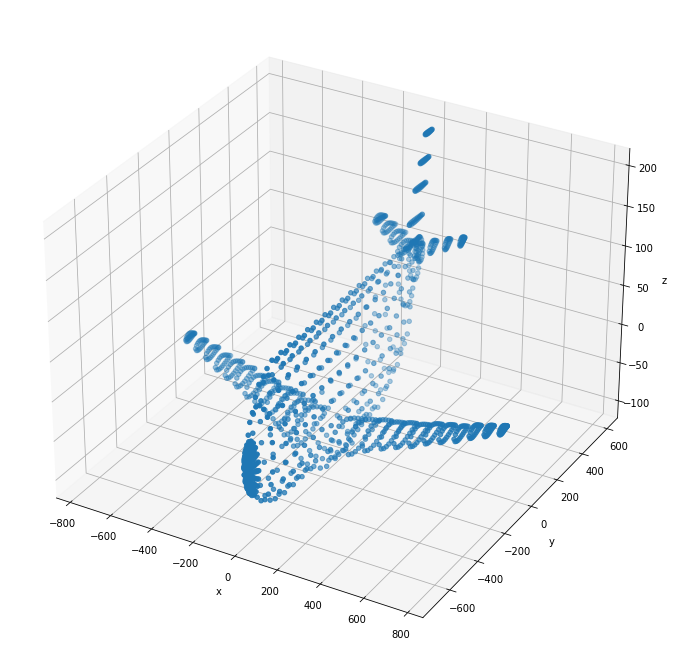

In [16]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(points[0,:], points[1,:],points[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


Item  1 , area in pixels 59143
item 1 ,area in pixels = 2318.642172
Item  2 , area in pixels 59211
item 2 ,area in pixels = 2321.3080440000003


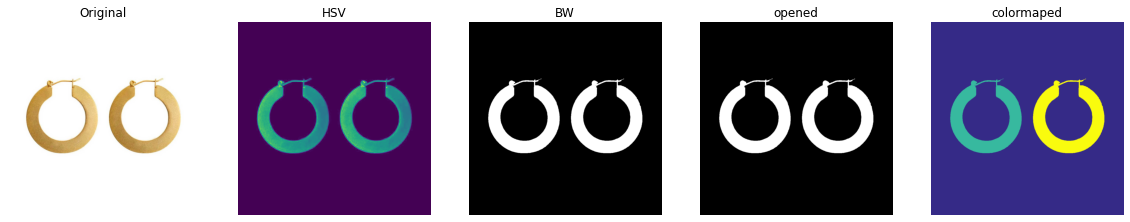

In [24]:
# Question 3
import cv2 as cv
import numpy as np

im = cv.imread("earrings.jpg", cv.IMREAD_COLOR)
assert im is not None

hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
th,bw = cv.threshold(hsv[:,:,1],0,255,cv.THRESH_BINARY+ cv.THRESH_OTSU)

# Remove dots in the object foreground 
w = 5
kernel = np.ones((w,w), np.uint8)
opened = cv.morphologyEx(bw,cv.MORPH_CLOSE,kernel)

retval, labels, stats, centroids = cv.connectedComponentsWithStats(bw)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA)

z = 720 # mm
f = 8 # mm

for i ,s in enumerate(stats):
    if i != 0:
        print('Item ', i, ', area in pixels' , s[4])
        print('item', i, ',area in pixels =',s[4]*(2.2e-3)**2*(z*z)/(f*f)) #pixel size 2.2um*2.2um


fig,ax = plt.subplots(1,5,figsize=(20,4))
ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[1].imshow(hsv[:,:,1])
ax[1].set_title('HSV')
ax[2].imshow(bw,cmap='gray')
ax[2].set_title('BW')
ax[3].imshow(cv.cvtColor(opened,cv.COLOR_BGR2RGB))
ax[3].set_title('opened')
ax[4].imshow(cv.cvtColor(colormapped,cv.COLOR_BGR2RGB))
ax[4].set_title('colormaped')

for i in range(5):
    ax[i].axis("off")

plt.show()


(0, 0, 0, 0)


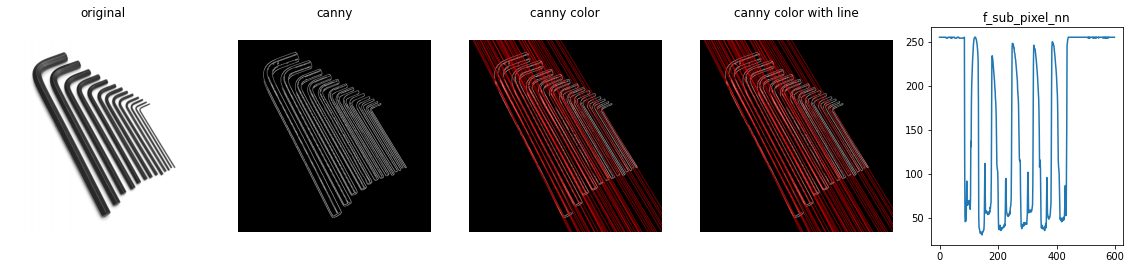

In [1]:
import cv2 as cv
import numpy as np
import matplotlib . pyplot as plt
im = cv . imread('allenkeys.jpg' , cv .IMREAD_REDUCED_GRAYSCALE_2)
canny = cv .Canny(im, 50, 150)

# Copy edges to the images that will display the results in BGR
canny_color = cv . cvtColor ( canny , cv .COLOR_GRAY2BGR)


lines = cv.HoughLines ( canny , 1 , np.pi/180 , 170 , None , 0 , 0)
if lines is not None :
    for i in range (0 , len (lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta )
        x0 = a*rho
        y0 = b*rho
        pt1 = (int(x0 + 1000*(-b)) , int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)) , int(y0 - 1000*(a)))
        cv.line(canny_color , pt1 , pt2 , (0 ,0 ,255) , 1 , cv.LINE_AA)

fig, ax = plt.subplots(1,5,figsize=(20,4))
ax[0].imshow(im,cmap = 'gray', vmin = 0, vmax=255)
ax[0].title.set_text('original')
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].imshow(cv.cvtColor(canny,cv.COLOR_BGR2RGB))
ax[1].title.set_text('canny')
ax[1].axis('off')
ax[1].xaxis.tick_top()

ax[2].imshow(cv.cvtColor(canny_color,cv.COLOR_BGR2RGB))
ax[2].title.set_text('canny color')
ax[2].axis('off')
ax[2].xaxis.tick_top()

cv.namedWindow( 'Image' , cv.WINDOW_AUTOSIZE)
cv.imshow( 'Image' , im)
cv.waitKey(0)
cv.imshow( 'Image' , canny )
cv.waitKey(0)
cv.imshow('Image' , canny_color )
r = cv.selectROI('Image' , canny_color , showCrosshair = True , fromCenter =False)
cv.waitKey(0)
cv.destroyAllWindows()
print (r)
x0 , y0 = int (r[0] +r[2]/2) , int(r[1]+r[3]/2)
m = b/a # Gradient
m = np.tan(np.median(lines[ : , 0, 1]))
c = y0 - m*x0 # Inte r cept
cv.line(canny_color , (0 , int(c)) , (im.shape[0] , int(m*im.shape[0] +  c)) , (0 ,255 ,0) , 2 , cv.LINE_AA)

ax[3].imshow(cv.cvtColor(canny_color,cv.COLOR_BGR2RGB))
ax[3].title.set_text('canny color with line')
ax[3].axis('off')
ax[3].xaxis.tick_top()


dy = 1
y_sub_pixel = np.arange(0 , im.shape[0] - 1 , dy )
f_sub_pixel = np.zeros_like(y_sub_pixel)
f_sub_pixel_nn = np.zeros_like(y_sub_pixel)
# https : / / youtu . be / v9CFu4r6tPY
for i , y in enumerate(y_sub_pixel):
    f_sub_pixel_nn[i] = im[i,y]

    # print(i,y)
    
# # Your code hear to generate the pix el values along the lin e
ax[4].plot(f_sub_pixel_nn)
ax[4].title.set_text('f_sub_pixel_nn')